Студенты успешно завершили два семестра обучения и теперь руководство хочет получить детальную информацию о том:
**а)** изменилась ли успеваемость по сравнению с предыдущим семестром;
**б)** больше ли студентов не явилось на контрольные и прочие финальные испытания (вкл. устный экзамен);
**в)** изменился ли средний балл за устный экзамен? за семестр?
**г)** есть ли особенности у групп разных уровней (от Elementary до Advanced), которые следует учитывать при методическом планировании нагрузки
**д)** группы какого уровня показали лучшую успеваемость по итогам года/каждого конкретного семестра? и т.д


**Задача – сравнить успеваемость разных групп студентов и ответить на вопроы выше**

**Описание данных:** два .csv файла* с оценками и идентичной структурой колонок, отражающие успеваемость по разным аспектам
в течение одного семестра каждый.
*персональные данные студентов заменены на uuid'ы в целях анонимизации и соблюдения всех требований обработки
такого типа персональных данных.

Столбцы:  
**stud_id** - уникальный идентификатор студента(uuid)                                                                          
**level** - уровень группы по шкале CEFR (от Elementary до Advanced)                                                                
**group** - номер группы (условный)

**practice_m1/m2/m3/m4** - баллы за работу на практических занятиях в 1,2,3 и 4 модуле соответственно(MAX - 15)                                  
**grammar_m1/m2/m3/m4** - баллы за работу занятиях по грамматике в 1,2,3 и 4 модуле соответственно. (MAX - 10)

**case_study/2nd_term** - баллы за решение прикладного кейса(ситуации, которая описывает финансовое положение конкрентной компании, вызовы, которые перед ней лежат и цели, которые нужно достичь. Студенты дожны выработать решение и предоставить отчет (MAX - 10)

**final_test** - баллы за финальный тест (последнее письменное испытание перед экзаменом (MAX - 10)                                      
**oral_exam** - баллы за ответ на устном экзамене (MAX - 20, 0 баллов при отказе от ответа)                                            
**pre_exam_total** - кол-во баллов за весь семестр за вычетом устного ответа на экзамене (MAX - 80)                                         
**total** - общее кол-во баллов за весь семестр (MAX - 100)                                      

# Импорт библиотке и краткий EDA

In [1]:
#импорт необходимых библиотек
import pandas as pd
import plotly.express as px
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Загрузим данные успеваемости за первый семестр
try:
    df = pd.read_excel('D:/datasets/points_mib_3rd_year.xlsx', index_col=0, decimal=',')
except:
    df = pd.read_excel('points_mib_3rd_year.xlsx', index_col=0, decimal=',')
else:
    print('Проверьте расположение файла')

In [3]:
#краткая проверка загрузки файла
df.sample(4, random_state=42)

,stud_id,level,group,practice_m1,grammar_m1,midterm,practice_m2,grammar_m2,case_study,final_test,oral_exam,pre_exam_total,total
549,7a122d75-250e-4138-b7fe-f53e00f3a53b,elem,38,12.0,7.0,7,4.0,3.0,8,6.5,0,47.5,47.5
83,e6468b52-a85c-42a3-bee3-1ff7a7b66bb3,advanced,6,13.0,10.0,7.7,9.0,3.0,10,8.3,19,61.0,80.0
524,faa4c462-56fa-47fa-88c1-5e90d0e610bc,elem,37,15.0,10.0,5.1,12.0,7.0,7,dnw,0,56.1,56.1
333,c487d336-a340-4f20-ad39-dc6c799aaad9,inter,24,14.0,9.3,8.7,12.0,8.0,7.5,8.1,18,67.6,85.6


In [4]:
#Загрузим данные успеваемости за второй семестр
try:
    df2 = pd.read_excel('D:/datasets/points_mib_3rd_year_2nd_term.xlsx', index_col=0, decimal=',')
except:
    df2 = pd.read_excel('points_mib_3rd_year_2nd_term.xlsx', index_col=0, decimal=',')

In [5]:
#краткая проверка результата
df2.sample(4, random_state=42)

,stud_id,level,group,practice_m3,grammar_m3,midterm_m3,practice_m4,grammar_m4,case_study_2nd_term,final_test_2nd_term,oral_exam_2nd_term,pre_exam_total_m4,total_2nd_term
141,3db4a79e-2661-4043-8add-1e48c9dc0eb1,upper,11,7.0,7.0,6.9,NaN,NaN,8,8.6,16,37.5,53.5
398,684d9bdf-cd1b-47fd-bb36-073aaba58186,inter,31,15.0,10.0,8.7,13.0,10.0,7.8,8.8,15.5,73.3,88.8
7,588d0d57-be21-4a14-ae3c-d2685b067076,advanced,1,1.1,0.0,dnw,0.0,0.0,dnw,dnw,dnc,1.1,1.1
335,edbc2dbb-356e-4b6b-9909-e54c45679108,inter,26,12.0,9.0,8.2,12.3,6.0,8.5,6.1,13.5,62.1,75.6


In [6]:
#напишем функцию для краткого обзора набора данных
def eda_analyse(df):
    print(f'Датасет содержит {df.shape[0]} cтроки(-у) и {df.shape[1]} столбцов.\n')
    print(f'В наборе данных имеется {df.duplicated().sum()} явных дубликатов.\n')
    print('Среднее количество пропусков в столбцах равно:\n', df.isna().mean())

In [7]:
#проверим на первом наборе данных
eda_analyse(df)

Датасет содержит 553 cтроки(-у) и 13 столбцов.

В наборе данных имеется 0 явных дубликатов.

Среднее количество пропусков в столбцах равно:
 stud_id           0.000000
level             0.000000
group             0.000000
practice_m1       0.001808
grammar_m1        0.001808
midterm           0.000000
practice_m2       0.001808
grammar_m2        0.001808
case_study        0.007233
final_test        0.001808
oral_exam         0.003617
pre_exam_total    0.000000
total             0.000000
dtype: float64


In [8]:
#повторим на втором датасете
eda_analyse(df2)

Датасет содержит 529 cтроки(-у) и 13 столбцов.

В наборе данных имеется 0 явных дубликатов.

Среднее количество пропусков в столбцах равно:
 stud_id                0.000000
level                  0.000000
group                  0.000000
practice_m3            0.003781
grammar_m3             0.003781
midterm_m3             0.003781
practice_m4            0.001890
grammar_m4             0.003781
case_study_2nd_term    0.000000
final_test_2nd_term    0.001890
oral_exam_2nd_term     0.007561
pre_exam_total_m4      0.000000
total_2nd_term         0.001890
dtype: float64


In [9]:
#проверим расход памяти для каждого набора данных
df.memory_usage(deep=True)

,0
Index,4424
stud_id,51429
level,34957
group,4424
practice_m1,4424
grammar_m1,4424
midterm,18828
practice_m2,4424
grammar_m2,4424
case_study,20176


In [10]:
#повторим для второго набора данных
df2.memory_usage(deep=True)

,0
Index,4232
stud_id,49197
level,33503
group,4232
practice_m3,4232
grammar_m3,4232
midterm_m3,17884
practice_m4,4232
grammar_m4,4232
case_study_2nd_term,19028


**В данном случае датасеты крошечные, а самые "громоздкие" в плане памяти столбцы - строковые. Здесь мы не станем прибегать к оптимизации, но на датасетах в 1+млн. строк следовало бы некоторые из них привести к типу Categorical, а целочисленные значения и таковые с дробной частью перевести в типы данных с меньшей разряднстью(int64 -> int8/int16, float64 -> float32/float16) в зависимости от максимального и минимально возможного значения для этих величин**

In [11]:
#оценим кол-во студентов по состоянию на 1й и 2й семестры
print(f'Число студентов в 1м семестре {df.stud_id.count()}')
print()
print(f'Число студентов в 2м семестре {df2.stud_id.count()}')
print()
print(f'Во 2м семестре кол-во студентов изменилось на {(df2.stud_id.count() - df.stud_id.count())/df.stud_id.count():.1%}')

Число студентов в 1м семестре 553

Число студентов в 2м семестре 529

Во 2м семестре кол-во студентов изменилось на -4.3%


**Количество студентов снизилось по результам зимней сессии.**

## Заполнение пропусков, более детальное изучение

In [12]:
#анализ размера датасета и типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 553
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stud_id         553 non-null    object 
 1   level           553 non-null    object 
 2   group           553 non-null    int64  
 3   practice_m1     552 non-null    float64
 4   grammar_m1      552 non-null    float64
 5   midterm         553 non-null    object 
 6   practice_m2     552 non-null    float64
 7   grammar_m2      552 non-null    float64
 8   case_study      549 non-null    object 
 9   final_test      552 non-null    object 
 10  oral_exam       551 non-null    object 
 11  pre_exam_total  553 non-null    float64
 12  total           553 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 60.5+ KB


In [13]:
#анализ размера датасета и типов данных (2й семестр)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, 1 to 529
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stud_id              529 non-null    object 
 1   level                529 non-null    object 
 2   group                529 non-null    int64  
 3   practice_m3          527 non-null    float64
 4   grammar_m3           527 non-null    float64
 5   midterm_m3           527 non-null    object 
 6   practice_m4          528 non-null    float64
 7   grammar_m4           527 non-null    float64
 8   case_study_2nd_term  529 non-null    object 
 9   final_test_2nd_term  528 non-null    object 
 10  oral_exam_2nd_term   525 non-null    object 
 11  pre_exam_total_m4    529 non-null    float64
 12  total_2nd_term       528 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 57.9+ KB


In [14]:
#вывод среднего кол-ва пропусков в столбцах
df.isna().mean()

,0
stud_id,0.000000
level,0.000000
group,0.000000
practice_m1,0.001808
grammar_m1,0.001808
midterm,0.000000
practice_m2,0.001808
grammar_m2,0.001808
case_study,0.007233
final_test,0.001808


In [15]:
#аналогично для второго семестра
df2.isna().mean()

,0
stud_id,0.000000
level,0.000000
group,0.000000
practice_m3,0.003781
grammar_m3,0.003781
midterm_m3,0.003781
practice_m4,0.001890
grammar_m4,0.003781
case_study_2nd_term,0.000000
final_test_2nd_term,0.001890


*Мы можем заметить пропуски в обоих датасетах, поскольку таблицы заполняются преподавателями вручную, то возможны пропуски вместо "неявка" и тд, которые мы ниже безвозбранно заменим на нули, поскольку в данном случае они эквивалентны. Также ряд столбцов с числовыми значениями с плавающей точкой указаны как строки, поскольку наборы данных содержат пометки **dnc/dnw**(*неявка/не писал тест* соответственно)*
* Поэтому мы визуализируем эти пропуски тестов и неявки для получения статистических данных, а затем заполним их нулями.

### Есть ли изменения по количеству неявок на экзамен?

In [16]:
#изучим, как много неявок было на экзамен
print('Неявки в 1-м семестре:', df[df.oral_exam == 'dnc']['oral_exam'].count())
print('Неявки во 2-м семестре:', df2[df2.oral_exam_2nd_term == 'dnc']['oral_exam_2nd_term'].count())

Неявки в 1-м семестре: 27
Неявки во 2-м семестре: 36


In [17]:
'''создадим переменные с общим кол-вом студентов
    в формате для констант в соответствии с PEP8
'''
#общее кол-во студентов
FIRST_TERM_COUNT =  df.count()['stud_id']
SECOND_TERM_COUNT =  df2.count()['stud_id']
#кол-во неявок
FIRST_TERM_DNC = df[df.oral_exam == 'dnc']['oral_exam'].count()
SECOND_TERM_DNC = df2[df2.oral_exam_2nd_term == 'dnc']['oral_exam_2nd_term'].count()

In [18]:
print('Общее кол-во студентов по состоянию на первый семестр:', FIRST_TERM_COUNT)
print('Общее кол-во студентов по состоянию на второй семестр:', SECOND_TERM_COUNT)

Общее кол-во студентов по состоянию на первый семестр: 553
Общее кол-во студентов по состоянию на второй семестр: 529


In [19]:
#вычислим процент неявок от числа студентов
print(f'Процент неявок в 1м семестре: {FIRST_TERM_DNC/FIRST_TERM_COUNT:.1%}, во 2м семестре: {SECOND_TERM_DNC/SECOND_TERM_COUNT:.1%}')

Процент неявок в 1м семестре: 4.9%, во 2м семестре: 6.8%


Перейдем к анализу количества неявок в сравнении с разбросом баллов за экзамен

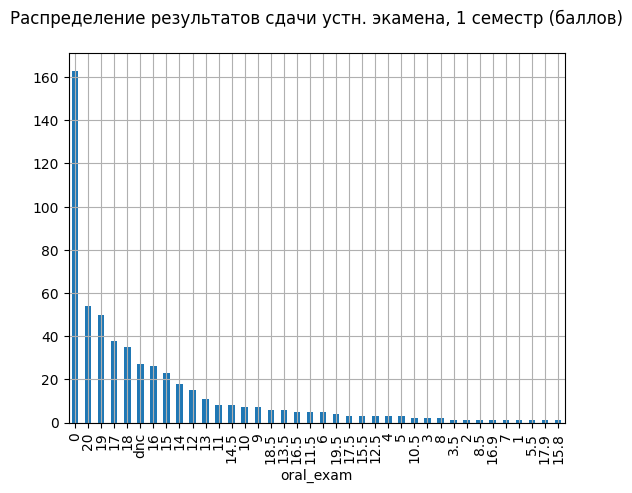

In [20]:
df.oral_exam.value_counts().plot(kind='bar',
                                 grid=True,
                                 title='Распределение результатов сдачи устн. экамена, 1 семестр (баллов)\n');

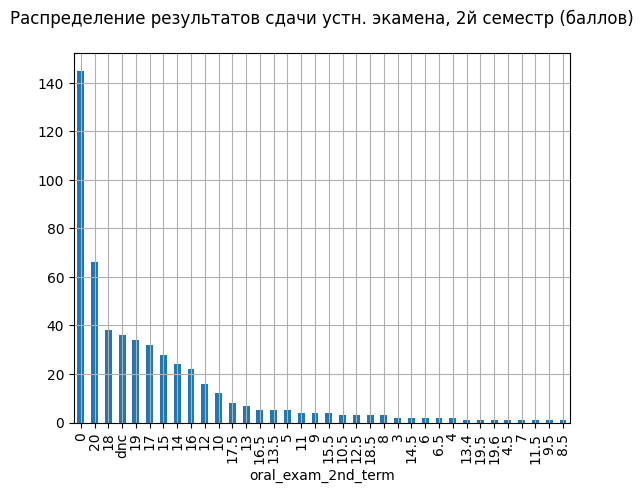

In [21]:
df2.oral_exam_2nd_term.value_counts().plot(kind='bar',
                                           grid=True,
                                           title='Раcпределение результатов сдачи устн. экамена, 2й семестр (баллов)\n');

**Любопытно, что в обоих случаях самые многочисленные исходы - это 0(отказ от ответа) и 20, или же максимальный балл. Также стабильно примерно 4-6й по частотности вариант - неявка.**

## Продолжение EDA

Теперь заменим строки dnw(=did not write/не писал) и dnc(=did not come/не явился) на нулевые значения, которые им эквивалентны. Применим функцию ко всему датафрейму, чтобы не делать слишком громоздкий код, ведь значения dnw/dnc могут быть в половине столбцов датасетов.

In [22]:
pd.set_option('future.no_silent_downcasting', True)

In [23]:
#проделаем процедуру для данных за первый семестр
df = df.replace({'dnw': 0, 'dnc': 0})
#проделаем процедуру для данных за второй семестр
df2 = df2.replace({'dnw': 0, 'dnc': 0})

In [24]:
#проверим результат, изучив типы данных в датафрейме после замены
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 553
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stud_id         553 non-null    object 
 1   level           553 non-null    object 
 2   group           553 non-null    int64  
 3   practice_m1     552 non-null    float64
 4   grammar_m1      552 non-null    float64
 5   midterm         553 non-null    object 
 6   practice_m2     552 non-null    float64
 7   grammar_m2      552 non-null    float64
 8   case_study      549 non-null    object 
 9   final_test      552 non-null    object 
 10  oral_exam       551 non-null    object 
 11  pre_exam_total  553 non-null    float64
 12  total           553 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 60.5+ KB


In [25]:
#аналогично для второго семестра
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, 1 to 529
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stud_id              529 non-null    object 
 1   level                529 non-null    object 
 2   group                529 non-null    int64  
 3   practice_m3          527 non-null    float64
 4   grammar_m3           527 non-null    float64
 5   midterm_m3           527 non-null    object 
 6   practice_m4          528 non-null    float64
 7   grammar_m4           527 non-null    float64
 8   case_study_2nd_term  529 non-null    object 
 9   final_test_2nd_term  528 non-null    object 
 10  oral_exam_2nd_term   525 non-null    object 
 11  pre_exam_total_m4    529 non-null    float64
 12  total_2nd_term       528 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 57.9+ KB


**Замена прошла успешно, теперь у нас лишь одна колонка со строковыми значениями, но это только из-за пропусков. * Столбцы с уровнем группы и uuid студентов остаются строковыми и не подлежат трансформациям.** Заполним пропуски нулями, как и намеревались выше и перейдем к статистическому анализу.

In [26]:
#заполнение пропусков в обоих датасетов
df = df.fillna(0)
df2 = df2.fillna(0)

In [27]:
#смотрим пропуски
df.isna().mean()

,0
stud_id,0.0
level,0.0
group,0.0
practice_m1,0.0
grammar_m1,0.0
midterm,0.0
practice_m2,0.0
grammar_m2,0.0
case_study,0.0
final_test,0.0


In [28]:
#проверяем изменение типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 553
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stud_id         553 non-null    object 
 1   level           553 non-null    object 
 2   group           553 non-null    int64  
 3   practice_m1     553 non-null    float64
 4   grammar_m1      553 non-null    float64
 5   midterm         553 non-null    object 
 6   practice_m2     553 non-null    float64
 7   grammar_m2      553 non-null    float64
 8   case_study      553 non-null    object 
 9   final_test      553 non-null    object 
 10  oral_exam       553 non-null    object 
 11  pre_exam_total  553 non-null    float64
 12  total           553 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 60.5+ KB


In [29]:
#смотрим пропуски за второй семестр
df2.isna().mean()

,0
stud_id,0.0
level,0.0
group,0.0
practice_m3,0.0
grammar_m3,0.0
midterm_m3,0.0
practice_m4,0.0
grammar_m4,0.0
case_study_2nd_term,0.0
final_test_2nd_term,0.0


In [30]:
#проверяем изменение типов данных
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, 1 to 529
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stud_id              529 non-null    object 
 1   level                529 non-null    object 
 2   group                529 non-null    int64  
 3   practice_m3          529 non-null    float64
 4   grammar_m3           529 non-null    float64
 5   midterm_m3           529 non-null    object 
 6   practice_m4          529 non-null    float64
 7   grammar_m4           529 non-null    float64
 8   case_study_2nd_term  529 non-null    object 
 9   final_test_2nd_term  529 non-null    object 
 10  oral_exam_2nd_term   529 non-null    object 
 11  pre_exam_total_m4    529 non-null    float64
 12  total_2nd_term       529 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 57.9+ KB


Замены прошли успешно и теперь подавляющее большинство столбцов с оценками в типе данных float.

In [31]:
#оценим основные статистические параметры набора данных
df.describe(exclude=[object])

,group,practice_m1,grammar_m1,practice_m2,grammar_m2,pre_exam_total,total
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,19.963834,11.944919,7.627667,11.211212,7.138517,58.866908,69.309855
std,11.178013,3.708500,2.886055,4.080803,3.112291,16.405745,20.516406
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,11.000000,6.000000,9.000000,5.000000,50.200000,55.600000
50%,21.000000,13.220000,9.000000,12.900000,8.000000,62.100000,71.300000
75%,30.000000,15.000000,10.000000,14.900000,10.000000,71.950000,86.900000
max,38.000000,15.000000,10.000000,15.000000,12.200000,79.300000,99.300000


In [32]:
#оценим основные статистические параметры второго набора данных
df2.describe(exclude=[object])

,group,practice_m3,grammar_m3,practice_m4,grammar_m4,pre_exam_total_m4,total_2nd_term
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,20.495274,10.463327,7.073743,9.850057,6.476578,54.873006,65.301361
std,11.263396,4.988796,3.400487,4.965971,3.560555,20.310415,23.908589
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,7.000000,4.800000,6.000000,3.900000,42.900000,49.800000
50%,21.000000,12.500000,8.500000,11.000000,7.500000,58.600000,68.400000
75%,31.000000,15.000000,10.000000,14.500000,10.000000,72.300000,86.450000
max,38.000000,15.000000,12.840000,16.000000,11.000000,79.400000,99.400000


### Наблюдения на основе основных стат.параметров:
* В целом никаких сюрпризов среди квантилей, средних и стандартному отклонению в наборах данных за два семестра нет.
* Из того, что бросается в глаза - существенная разница среднего и стандартного отклонения результатов за весь семестр(оба семестра) и баллов за весь семестр за вычетом экзамена(тоже оба семестра), что указывает на большую дисперсию баллов, если у нас баллы за семестр отличаются друг от друга на 1/5 от максимума(100 баллов).
* Также интересно отметить, что граница первого квартиля для итоговых баллов за 1й и 2й семестр проходит немногим выше минимального балла для сдачи экзамена/зачета с оценкой - 46 баллов, но если в первом семестре до четверти студентов сдали "с запасом"(в среднем на 55,6 блв), то во втором семестре граница квартиля для четверти студентов составил 49,8, что показывает разницу в 5,5+ баллов и опасную близость к минимального балла для зачета. Разумеется, мы не можем утверждать, что четверть студентов сдали с таким баллом, границы границы квантилей лишь демонстрируют, что четверть оценок лежит на шкале от 0 до 55,6 и 49,8 баллов соответственно, но об опеределенных тенденциях сдвиг этой отсечки говорит.
* Также бросается в глаза нисходящий тренд баллов за практические занятия с 1 по 4 модуль(practice_m1-4), которые в среднем достигали 11,94/15 для первого семестра, составили 11,21/15 за вторую часть того же семестра, а уже во второй половине учебного года упали до 10,46 и 9,85 на конец года соответственно.
* Аналогично предыдущему пункту, подобную тенденцию на снижение среднего балла за аспект грамматики (grammar_m1-4) с 1 по 4й модуль: в первом модуле - 7,62/10, в последнем - 6,47, средний балл по аспекту также снижается каждый модуль

## Выявление закономерностей и сравнение успеваемости во времени и по уровням

Ниже мы сравним данные за два семестра, в целом и для отдельных групп. А поскольку у нас доступна вся генеральная совокупность, то мы можем найти ответы без статистических тестов. Сперва мы оценим взглянем на общую картину по сдаче/несдаче зачетов, визуализируем её и перейдём к успеваемости по группам владения языков.

**P.S. Константы в соответствии с PEP-стандартом**

In [33]:
#создадим константы для общ. числа, сдавших и проваливших экзамен студентов
TOTAL = df.count()['stud_id'] #общее число студентов на 1й семестр
PASSED = df.loc[df.total >= 41].count()['stud_id'] #кол-во сдавших
FAILED = df.loc[df.total < 41].count()['stud_id'] #сколько не сдали

'''Повторим для данных за второй семестр года'''
TOTAL_TERM_TWO = df2.count()['stud_id'] #общее число студентов на 1й семестр
PASSED_2ND = df2.loc[df2.total_2nd_term >= 41].count()['stud_id'] #кол-во сдавших
FAILED_2ND = df2.loc[df2.total_2nd_term < 41].count()['stud_id'] #сколько не сдали


In [34]:
stages = ["Total", "Passed", "Failed"]
df_1st = pd.DataFrame(dict(number=[TOTAL, PASSED, FAILED], stage=stages))
df_1st['term'] = 'First_term'
df_2nd = pd.DataFrame(dict(number=[TOTAL_TERM_TWO, PASSED_2ND, FAILED_2ND], stage=stages))
df_2nd['term'] = 'Second_term'
df_new = pd.concat([df_1st, df_2nd], axis=0)
fig = px.funnel(df_new, x='number', y='stage', color='term')
fig.show()

**DISCLAIMER**: Поскольку GitHub не отражает интерактивные графики plotly, ниже идет фото.

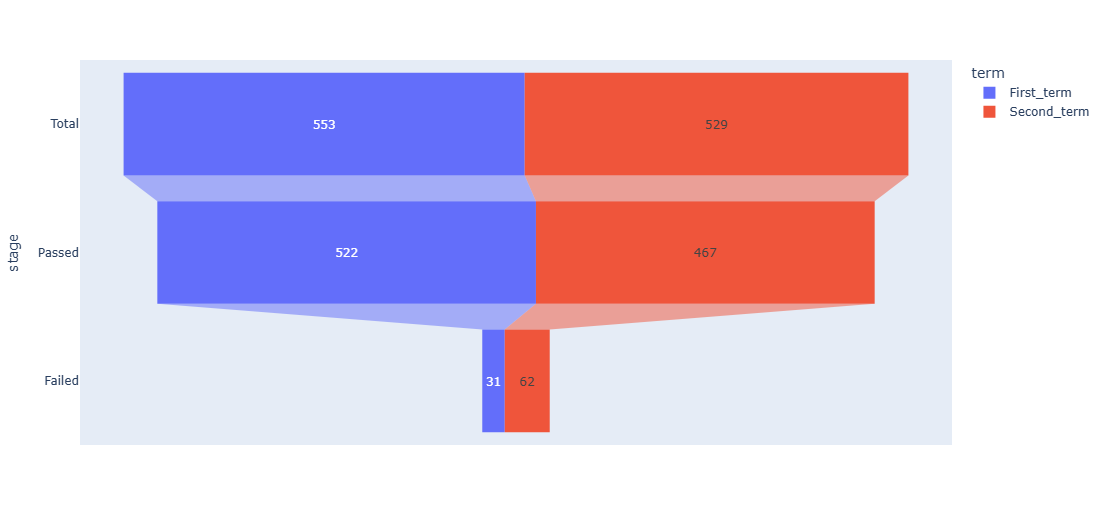

Любопытно, что заваливших устный зачет во втором семестре стало в 2 раза больше. Продолжим анализ данных в других разрезах.

## Какой уровень владения показал лучшую успеваемость? Есть ли тенденция на рост/снижение среднего балла?

In [35]:
#оценка общего распределения по группам владения языком
df.level.value_counts()

,count
level,
upper,193
advanced,128
inter,119
pre_inter,80
elem,33


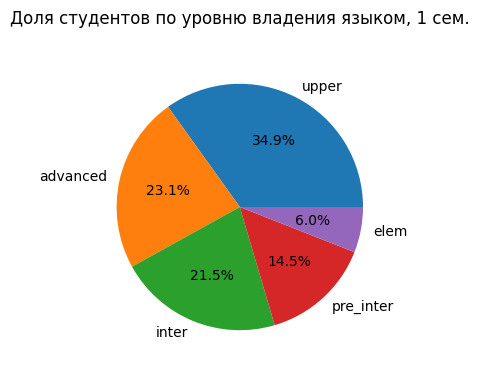

In [36]:
#визуализируем распределение
df.level.value_counts().plot(kind='pie', figsize=(4,4), legend=False,
                             autopct='%0.1f%%',
                             title='Доля студентов по уровню владения языком, 1 сем.\n');
plt.ylabel(None);

Больше всего в первом семестре было студентов с уровнем "выше среднего"(Upper Intermediate) - 193 студ., 128 продвинутых студентов (Advanced) и 119 студентов среднего уровня(Pre-Intermediate). Студентов "ниже среднего" - 80 человек и всего 33 студента начинающего уровня.

In [37]:
#оценка общего распределения по группам владения языком
df2.level.value_counts()

,count
level,
upper,167
advanced,131
inter,113
pre_inter,86
elem,32


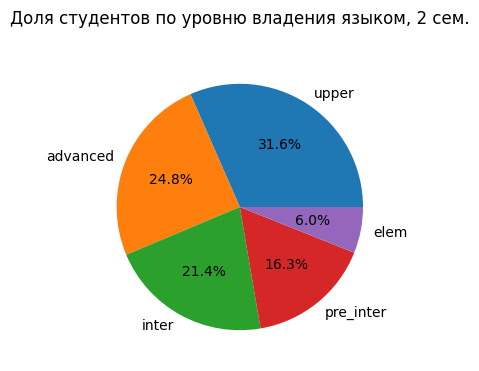

In [38]:
#визуализируем распределение за второй семестр
df2.level.value_counts().plot(kind='pie', figsize=(4,4), legend=False,
                             autopct='%0.1f%%',
                             shadow=False, startangle=0,
                             title='Доля студентов по уровню владения языком, 2 сем.\n');
plt.ylabel(None);

Любопытно, что группы Upper-Intermediate стали на 3% менее многочисленными, "продвинутые" группы потеряли 1,7% в численности, а группы "ниже среднего" (Pre-Intermediate) сократились на 1,8%. Elementary не изменился, а Intermediate потерял лишь 0,1% студентов.

Теперь изучим их успеваемость.

In [39]:
#создадим сводную таблицу
first_term_pivot = df.pivot_table(index='level', values=['pre_exam_total', 'total'], aggfunc='mean')

#оценим таблицу
first_term_pivot.sort_values(by='total', ascending=False)

,pre_exam_total,total
level,,
advanced,61.641016,75.378125
upper,60.837772,72.116528
inter,56.447143,66.165630
pre_inter,55.185625,61.458125
elem,54.230303,59.730303


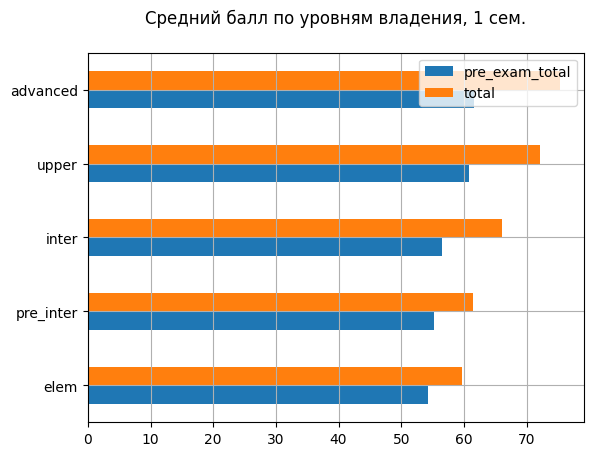

In [40]:
#визуализируем сводные данные
first_term_pivot.sort_values(by='total', ascending=True).plot(
    kind='barh', legend=True, grid=True,
                title='Cредний балл по уровням владения, 1 сем.\n');
plt.ylabel(None);

Теперь проделаем то же для второго семестра

In [41]:
#создадим сводную таблицу
second_term_pivot = df2.pivot_table(index='level', values=['pre_exam_total_m4', 'total_2nd_term'], aggfunc='mean')

#оценим таблицу
second_term_pivot.sort_values(by='total_2nd_term', ascending=False)

,pre_exam_total_m4,total_2nd_term
level,,
advanced,59.078092,72.521603
upper,57.670898,69.964311
inter,51.223540,59.993451
pre_inter,51.315000,56.599884
elem,45.506250,53.537500


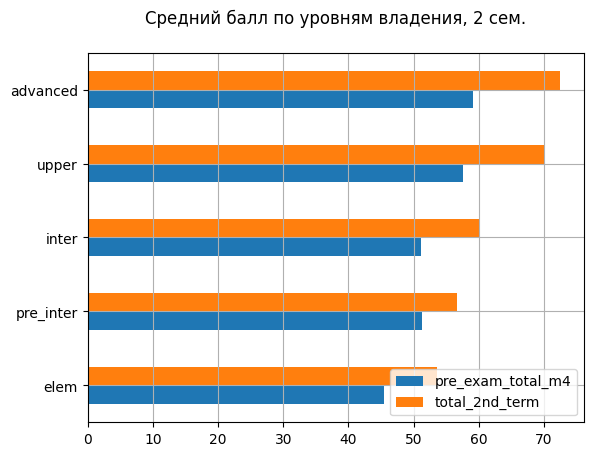

In [42]:
#визуализируем сводные данные
second_term_pivot.sort_values(by='total_2nd_term', ascending=True).plot(
    kind='barh', legend=True, grid=True,
                title='Cредний балл по уровням владения, 2 сем.\n');
plt.ylabel(None);

In [43]:
#объединим две таблицы общей успеваемости за два семестра
performance = first_term_pivot.merge(second_term_pivot, on='level', how='inner')
#проверим объединение и отсортируем значения
performance.sort_values(by='total', ascending=False)

,pre_exam_total,total,pre_exam_total_m4,total_2nd_term
level,,,,
advanced,61.641016,75.378125,59.078092,72.521603
upper,60.837772,72.116528,57.670898,69.964311
inter,56.447143,66.165630,51.223540,59.993451
pre_inter,55.185625,61.458125,51.315000,56.599884
elem,54.230303,59.730303,45.506250,53.537500


In [44]:
#подсветим максимальные/минимальные значения, чтобы облегчить сравнение
performance.style.highlight_max(color='green').highlight_min(color='red')

,pre_exam_total,total,pre_exam_total_m4,total_2nd_term
level,,,,
advanced,61.641016,75.378125,59.078092,72.521603
elem,54.230303,59.730303,45.506250,53.537500
inter,56.447143,66.165630,51.223540,59.993451
pre_inter,55.185625,61.458125,51.315000,56.599884
upper,60.837772,72.116528,57.670898,69.964311


**Вполне ожидаемо, уровень успеваемости идеально совпадает с градацией уровней владения языком. Подведем промежуточный итог:**
* Самым сильным уровнем стал продвинутый/Advanced, а самым слабым - начинающий/Elementary. Пока никаких сюрпризов.
* У абсолютно всех уровней(!) наблюдается тенденция на снижение среднего балла за семестр с учетом экзамена и без. Без исключений.
Необходимо провести опрос среди студентов в конце учебного года, чтобы выяснить причины снижения успеваемости на всех уровнях. Подобные мероприятия могут повысить удовлетворенность обучением, улучшить восприятие бренда университета и в целом, помочь с освоением материала.

## Какие тренды есть применительно к баллам за устный экзамен?

Изучим разброс баллов за экзамен в первом и втором семестре, а для пущей глубины наблюдения мы увеличим гранулярность и раздробим студентов на группы по уровню владения языком.

In [45]:
#создадим сводную таблицу для первого семестра
first_term_oral = df.pivot_table(index='level', values='oral_exam', aggfunc='mean')

#оценим таблицу
first_term_oral.sort_values(by='oral_exam', ascending=False)

,oral_exam
level,
advanced,13.5
upper,11.278756
inter,9.37395
pre_inter,6.2725
elem,5.5


In [46]:
#создадим сводную таблицу для первого семестра
first_term_oral = df.pivot_table(index='level', values='oral_exam', aggfunc='mean')

#оценим таблицу
first_term_oral.sort_values(by='oral_exam', ascending=False)

,oral_exam
level,
advanced,13.5
upper,11.278756
inter,9.37395
pre_inter,6.2725
elem,5.5


Средний балл строго соответствует уровню владения языком на основании данных за устный экзамен в первом семестре. Необходимо сравнение со вторым.

In [47]:
#Повторим для второго семестра
#создадим сводную таблицу для первого семестра
second_term_oral = df2.pivot_table(index='level', values='oral_exam_2nd_term', aggfunc='mean')

#оценим таблицу
second_term_oral.sort_values(by='oral_exam_2nd_term', ascending=False)

,oral_exam_2nd_term
level,
advanced,12.977863
upper,12.391617
inter,8.769912
elem,8.03125
pre_inter,5.284884


In [48]:
#объединим две таблицы ответов на экзамене за два семестра
performance_exam = first_term_oral.merge(second_term_oral, on='level', how='inner')
#проверим объединение и подчеркнем экстремумы в таблице
performance_exam.style.highlight_max(color='green').highlight_min(color='red')

,oral_exam,oral_exam_2nd_term
level,,
advanced,13.500000,12.977863
elem,5.500000,8.031250
inter,9.373950,8.769912
pre_inter,6.272500,5.284884
upper,11.278756,12.391617


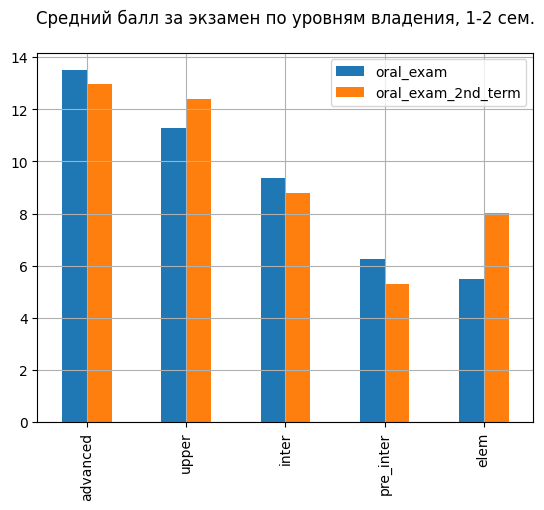

In [49]:
performance_exam.sort_values(by='oral_exam', ascending=False).plot(
    kind='bar', legend=True, grid=True,
                title='Cредний балл за экзамен по уровням владения, 1-2 сем.\n');
plt.xlabel(None);

Тенденция за второй семестр несколько изменилась:
* отрыв студентов с уровнем "выше среднего"/Upper Intermediate стал едва различим, ранее он составлял в среднем 2,23 балла по сравнению с "продвинутыми"/Advanced студентами, а во втором семестре составила всего 0,58 балла, хотя продвинутые студенты всё еще могут похвастать самым высоким средним баллом за экзамен.
* Также изменилась расстановка групп "ниже среднего"/Pre-Intermediate и "начинающих"/Elementary - если в первом семестре самый слабый уровень отставал по среднему баллу на 1,23 от групп "ниже среднего", то во втором семестре они поменялись местами - группы "ниже среднего" показали не только самый слабый результат из всех уровней, но и отстали от "начинающих" групп, а также показали более низкий результат, чем у "начинающих" групп в первом семестре.
* Студенты Elementary смогли в среднем улучшить балл на экзамене на 2,53, что существенно.
* В заключение, добавим, что здесь также наблюдается тенденция на снижение среднего балла по сравнению с первым семестром, он вырос только у групп "выше среднего"/Upper Intermediate и Elementary во втором семестре - на 1,12 и 2,53 балла соответственно.

Прежде чем подвести итог исследования изучим также разброс баллов за ответ на экзамене в обоих семестрах.

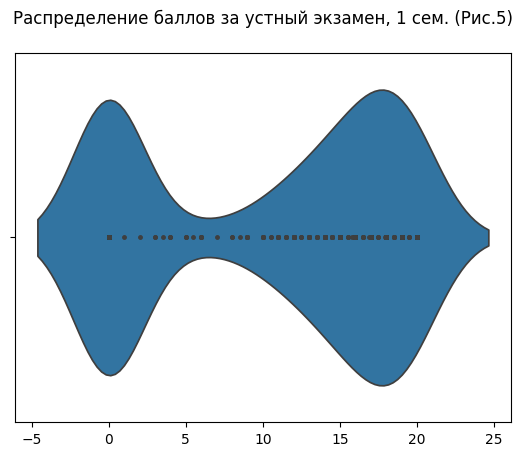

In [50]:
sns.violinplot(x=df['oral_exam'], inner='point');
plt.title('Распределение баллов за устный экзамен, 1 сем. (Рис.5)\n');
plt.xlabel(None);

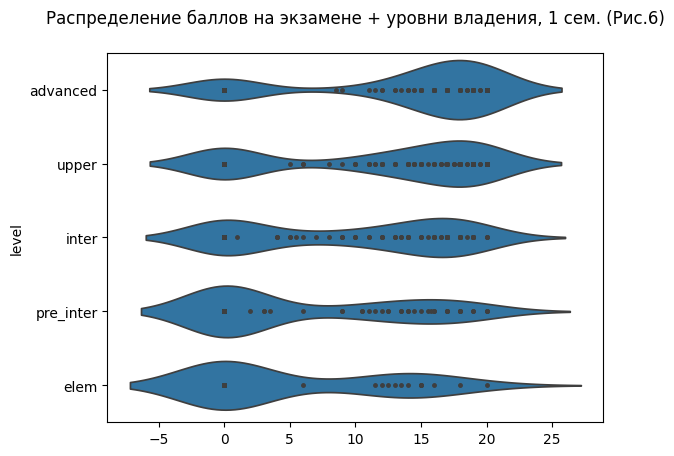

In [51]:
#увеличим гранулярность данных, добавив уровни владения
sns.violinplot(x=df['oral_exam'], y=df['level'], inner='point');
plt.title('Распределение баллов на экзамене + уровни владения, 1 сем. (Рис.6)\n');
plt.xlabel(None);

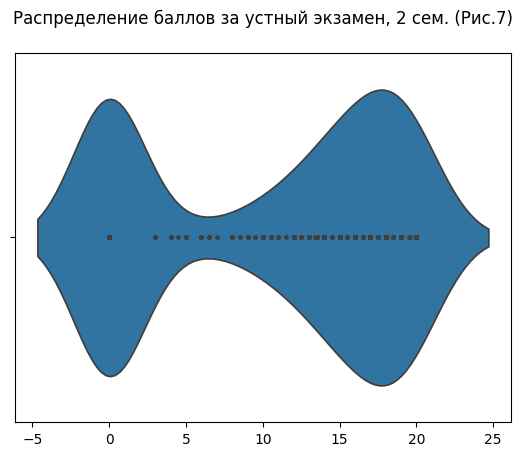

In [52]:
#повторим для второго семестра
sns.violinplot(x=df2['oral_exam_2nd_term'], inner='point');
plt.title('Распределение баллов за устный экзамен, 2 сем. (Рис.7)\n');
plt.xlabel(None);

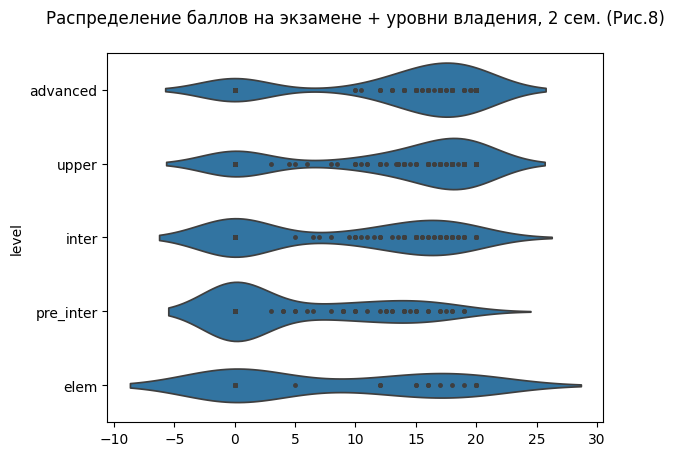

In [53]:
sns.violinplot(x=df2['oral_exam_2nd_term'], y=df2['level'], inner='point');
plt.title('Распределение баллов на экзамене + уровни владения, 2 сем. (Рис.8)\n');
plt.xlabel(None);

### Выводы по анализу баллов за устный экзамен
* Мы обнаружили, что средний балл за устный экзамен подвержен такому же тренду, как и баллы за семестр(с учетом экзамена и без) - тренд на снижение семестр к семестру, но есть и несколько нюансов.
Количество проваливших устный зачет также растет от семестра к семестру, ровно в 2 раза (31 -> 62)
* Помимо тренда на снижение, размер средного балла на экзамене строго коррелирует с уровнем владения языком: самый высокий балл у "продвинутых групп"/Advanced, cамый низкий - у "начинающих"/Elementary. Во втором семестре этот тренд, однако, меняется: разрыв между "продвинутыми" группами и таковыми "ниже среднего" сокращается и становится едва заметным(0,58 балла против 2,23 в первом семестре), а группы "ниже среднего" показывают не только самый слабый результат из всех уровней, отстают от "начинающих" групп, а также показывают более низкий результат, чем у "начинающих" групп в первом семестре.
* Как уже отмечалось выше, группы Advanced немного просели в своих экзаменационных результатах во втором семестре, а Upper Intermediate - наоборот почти догнал более старший уровень.

**Также уделим внимание визуализации оценок за экзамен в первом и втором семестре на скрипичной диаграмме**
Данный тип диаграммы удобен тем, что отображает не только разброс значений, что могло бы помочь выявить выбросы, но и плотность/многочисленность значений. Опишем ряд наблюдений:
* В первом семестре студенты большинства уровней, кроме Elementary и Pre-Intermediate, предпочитали отвечать на экзамене, а не отказыаться от ответа, об этом можно судить по разбросу на графиках (см. Рис.6), где бОльшая часть баллов сосредоточена между 5 и 20 баллами(максимальный), в противном случае пик был бы в районе нуля баллов при многочисленных отказах.
* Исключение составляют группы Elementary и Pre-Intermediate, у которых видно сосредоточение около отметки 0, т.е. студенты чаще выбирают отказ от устного ответа. Видимо здесь имеет место неуверенность в своих силах, свойственная студентам низких уровней.
* На высоких уровнях (Advanced и Upper Intermediate) меньше нулевых значений, что лишь подтверждает предыдущий вывод о корреляции желания отвечать на экзамене и уровня владения языком.
* Скрипичный график за второй семестр (см. Рис.8) также указывает на то, что студент уровня "ниже среднего"/Pre-Intermediate чаще отказывались от экзамена(пик у нуля), что подкрепляет наблюдение из предыдущего раздела о снижении среднего, похоже, что здесь есть связь.
* Аналогично, график за второй семестр (см. Рис.8) демонстрирует, что студенты уровня "начинающие" наоборот реже отказывались от ответа в летнюю сессию, поэтому средний балл за экзамен заметно вырос семестр к семестру.
* Что касается графиков разброса баллов для всех групп (см. Рис. 5 и 7 соответственно), вне зависимости от их уровня, то тут картина примерно одинакова в двух семестрах, но во втором семестре разброс больше сконцентрирован на 0(отказ от ответа) и от 4 до 20, хотя в первом семестре рассеяние более равномерное по всей шкале от 0 до 20.

## Заключительные выводы и рекомендации

Мы изучили данные успеваемости студентов за два семестра и можем указать на некоторые закономерности, которые необходимо глубже изучить.
* Все группы демонстрируют снижение баллов по большинству аспектов, а также снижение среднего балла за экзамен семестр к семестру, исходя из чего есть смысл провести анкетирование среди студентов, где было бы целесообразно дать им возможность оценить сложность материала, качество подачи, жесткость требований на экзаменах и так далее. Анкетирование имеет смысл проводить после каждого модуля, "по горячим следам", пока студенты еще могут объективно выразить свое восприятие. Подобная мера поможет понять, вызвано ли снижение баллов общей усталость за учебный год или другими факторами, поддающимися корректировке.
* Количество неявок на экзамен незначительно увеличилось к концу учебного года, от 4,9% от общего числа студентов в 1м семестре до 6,8% во 2м, что не выглядит угрожающей тенденцией. В качестве рекомендации можно предложить дополнительное информирование студентов по электронной почте(если они не получили информацию на занятиях из-за редкого посещения или других причин), чтобы можно было развеять страх перед устным экзаменом.
* Также рекомендуется проводить подобный анализ успеваемости ежегодно/ежесеместрово, чтобы выявлять заблаговременно снижение успеваемости и прорабатывать возможные причины, тем самым повышая удовлетворенность студентов учебным процессом.